# <img src="https://miro.medium.com/max/634/1*RTYreJ-PHBj2S33Eif2acA.jpeg" width="600" height="360" />

 # **Gender Recognition by Voice**

# **Table of Contents**

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Data Visualization](#section3)
4. [Preprocessing](#section4)
5. [Model fitting and evaluation](#section5)

# **Problem Statement**

* The aim of this project is Gender Recognition by Voice and Speech Analysis.   
* This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis with an analyzed frequency range of 0hz-280hz (human vocal range).



The Dataset
The following acoustic properties of each voice are measured and included within the CSV:
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
-	median: median frequency (in kHz)
-	Q25: first quantile (in kHz)
-	Q75: third quantile (in kHz)
-	IQR: interquantile range (in kHz)
-	skew: skewness (see note in specprop description)
-	kurt: kurtosis (see note in specprop description)
-	sp.ent: spectral entropy
-	sfm: spectral flatness
-	mode: mode frequency
-	centroid: frequency centroid (see specprop)
-	peakf: peak frequency (frequency with highest energy)
-	meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
-	maxfun: maximum fundamental frequency measured across acoustic signal
-	meandom: average of dominant frequency measured across acoustic signal
-	mindom: minimum of dominant frequency measured across acoustic signal
-	maxdom: maximum of dominant frequency measured across acoustic signal
-	dfrange: range of dominant frequency measured across acoustic signal
-	modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
-	label: male or female


# **Data Loading and Description**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**Observations**
1.   No null values in 3168 observations with 20 columns.
2.   All X(Independent Variable) columns are numerical columns
3.   Column Y(Target Variable) is categorical

It is a Supervised classification problem with 2 classes - Male and Female. Classification algorithms can be used to train model.



label
female    1584
male      1584
Name: label, dtype: int64


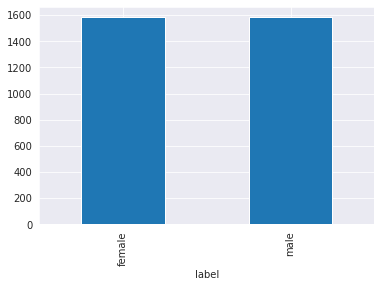

In [24]:
# Data distribution for both classes
classes=data["label"].groupby(data["label"]).count()
print(classes)
classes.plot(kind='bar')

Distribution of both classes is equal, dataset is uniform so good to go with further steps

In [25]:
#OHE to encode target variable(categorical) column
data_encoded = pd.get_dummies(data, columns=['label'])

In [26]:
data_encoded.drop(columns=['label_male']).head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label_female
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


pd.get_dummies coding:

*   Male - 0
*   Female - 1

# **Data Visualization**

out


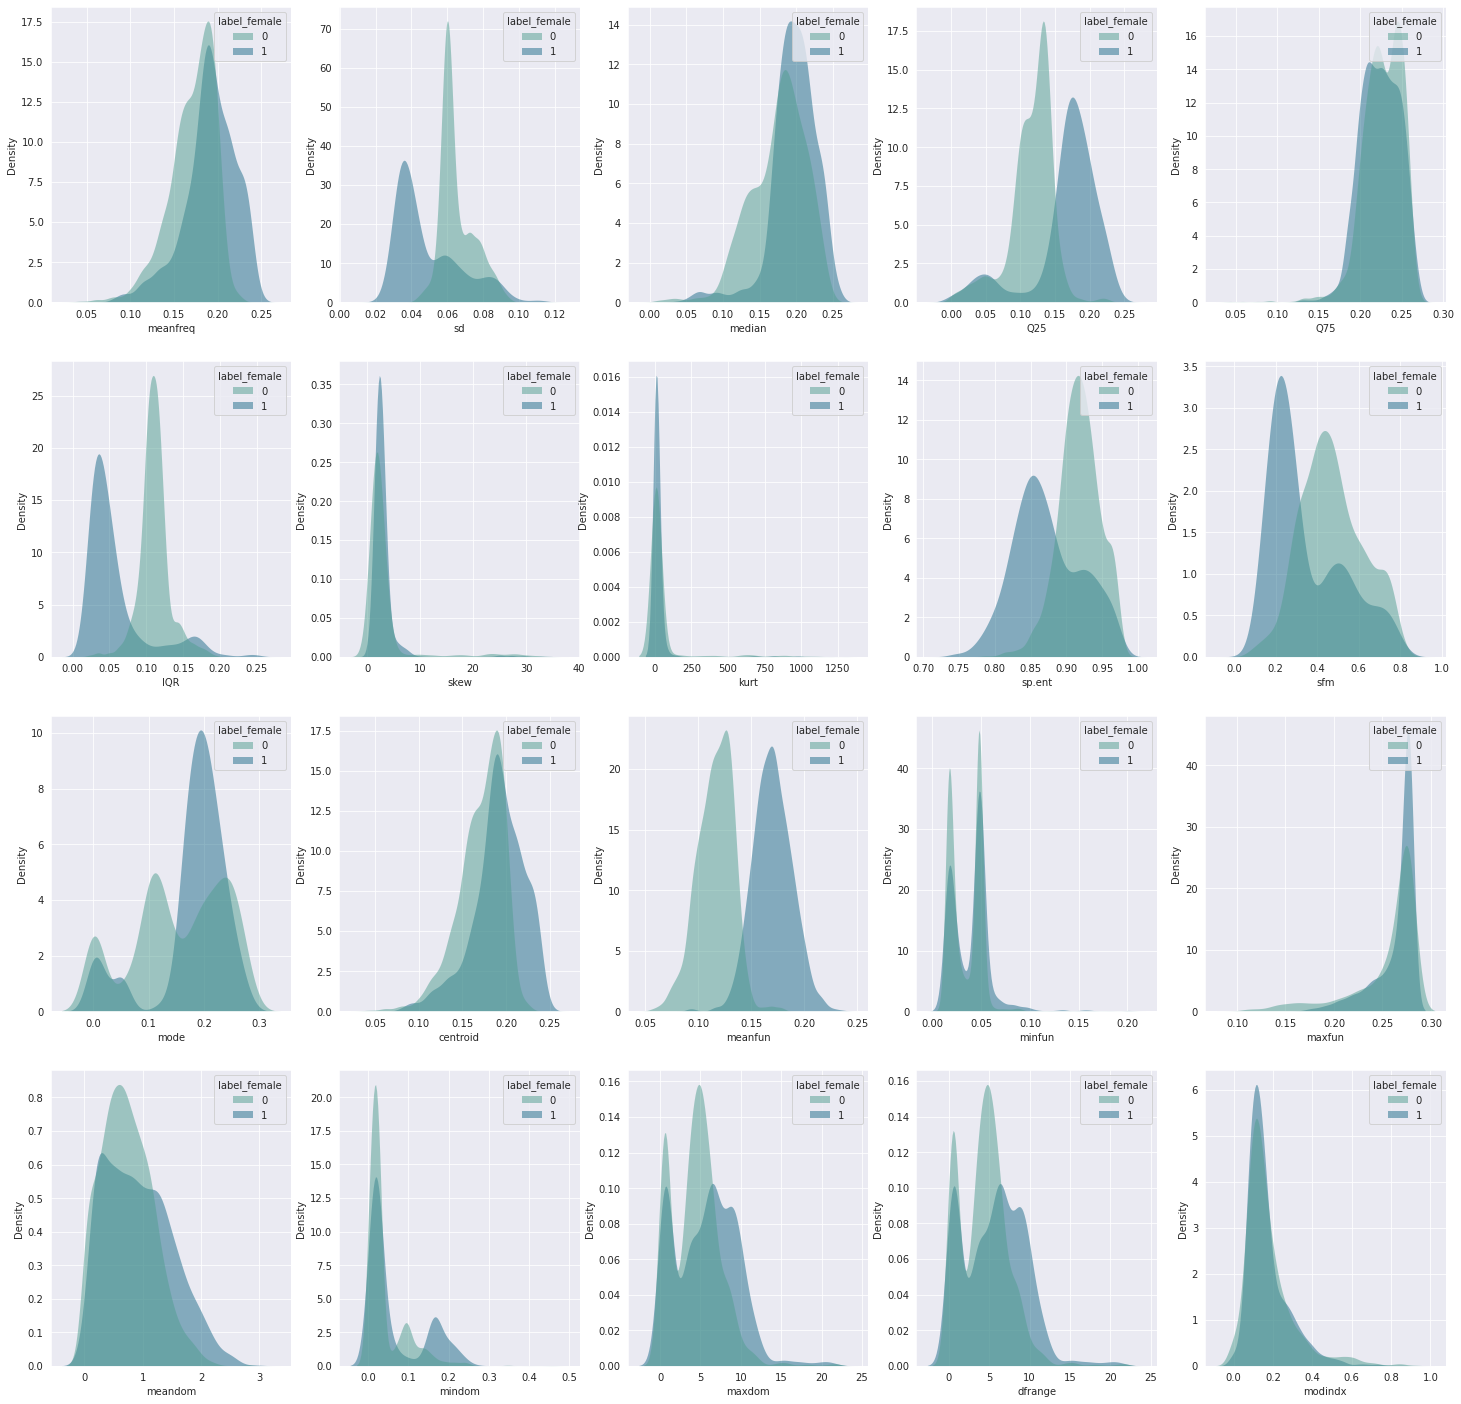

In [27]:
#kdeplot to plot probability density of all parameters with respect to male and female
plt.subplots(4,5,figsize=(25,25))
for i in range(1,21):
  plt.subplot(4,5,i)
 
  sns.kdeplot(
   data=data_encoded, x=data_encoded.columns[i-1], hue="label_female",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
  )

print('out')

The columns or parameters that gives clearer separation between male and female are - sd, Q25, IQR, sp.ent, sfm, mode and meanfun.
Let's keep only these columns.

In [28]:
#Feature selection based on visualization
col_list = ['sd','Q25','IQR','sp.ent','sfm','mode','meanfun','label_female']

In [29]:
data_final = data_encoded[col_list]
data_final

,sd,Q25,IQR,sp.ent,sfm,mode,meanfun,label_female
0,0.064241,0.015071,0.075122,0.893369,0.491918,0.000000,0.084279,0
1,0.067310,0.019414,0.073252,0.892193,0.513724,0.000000,0.107937,0
2,0.083829,0.008701,0.123207,0.846389,0.478905,0.000000,0.098706,0
3,0.072111,0.096582,0.111374,0.963322,0.727232,0.083878,0.088965,0
4,0.079146,0.078720,0.127325,0.971955,0.783568,0.104261,0.106398,0
...,...,...,...,...,...,...,...,...
3163,0.084734,0.049285,0.151859,0.962934,0.763182,0.200836,0.182790,1
3164,0.089221,0.042718,0.162193,0.960716,0.709570,0.013683,0.188980,1
3165,0.095798,0.033424,0.190936,0.946854,0.654196,0.008006,0.209918,1
3166,0.090628,0.043508,0.176435,0.950436,0.675470,0.212202,0.172375,1


Lets visualize the distribution of all statistical components of frequency with label - male and female.

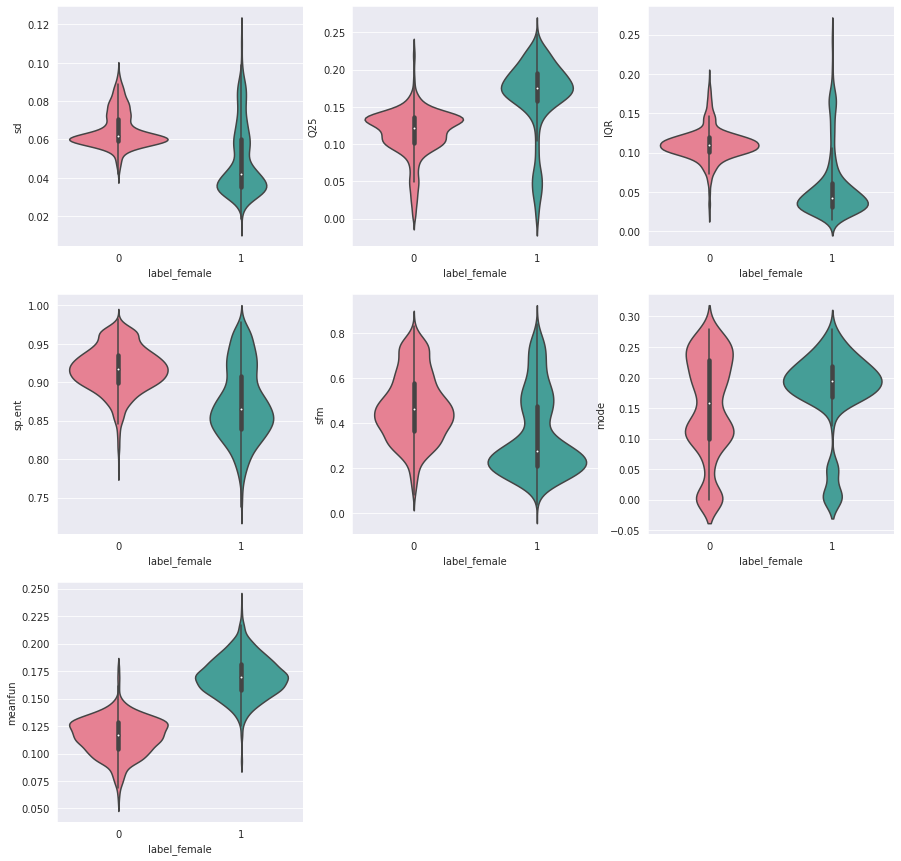

In [30]:
plt.subplots(figsize=(15,15))
for i in range(1,8):
  plt.subplot(3,3,i)
  sns.violinplot(x="label_female", y=data_final.columns[i-1], palette="husl", data=data_final)

**Observations** 
1. The behaviour looks similar for both male and female classes with different parameters for most cases.
2. The median in violin plots is close for male and female, so visually its not possible to differentiate. But in IQR and meanfun a little bit of visual separation is possible as less amount of data overlaps.

Lets draw scatter plot to see visual separation.


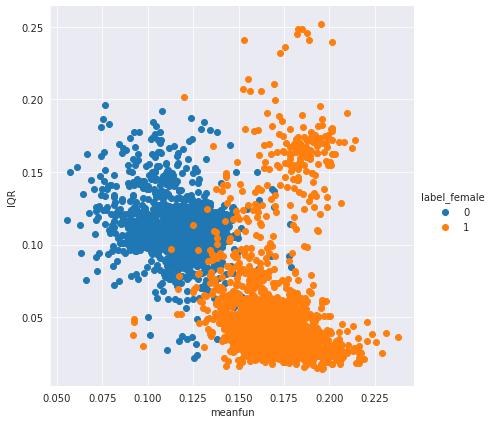

In [31]:
  sns.FacetGrid(data_final, hue ="label_female",  height = 6).map(plt.scatter, 'meanfun', 'IQR').add_legend() 

**Observations** 

For a quick visual classification, IQR and meanfun columns can be used to differentiate male and female voices.



**Steps to follow:**
1. Split data to train-test 
2. Data Pre-processing
3. Model training with selected parameters 
4. Model training with all parameters 

# **Data Preprocessing**

In [32]:
# prepare data for training set

#X- all columns except label(Male, Female)
X = data_final.iloc[:, 0:-1]

#Y - label
y = data_final.iloc[:, -1]

print(X,y)

            sd       Q25       IQR    sp.ent       sfm      mode   meanfun
0     0.064241  0.015071  0.075122  0.893369  0.491918  0.000000  0.084279
1     0.067310  0.019414  0.073252  0.892193  0.513724  0.000000  0.107937
2     0.083829  0.008701  0.123207  0.846389  0.478905  0.000000  0.098706
3     0.072111  0.096582  0.111374  0.963322  0.727232  0.083878  0.088965
4     0.079146  0.078720  0.127325  0.971955  0.783568  0.104261  0.106398
...        ...       ...       ...       ...       ...       ...       ...
3163  0.084734  0.049285  0.151859  0.962934  0.763182  0.200836  0.182790
3164  0.089221  0.042718  0.162193  0.960716  0.709570  0.013683  0.188980
3165  0.095798  0.033424  0.190936  0.946854  0.654196  0.008006  0.209918
3166  0.090628  0.043508  0.176435  0.950436  0.675470  0.212202  0.172375
3167  0.092884  0.070072  0.180756  0.938829  0.601529  0.267702  0.185607

[3168 rows x 7 columns] 0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164 

In [33]:
#Test-train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.describe()

,sd,Q25,IQR,sp.ent,sfm,mode,meanfun
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,0.057110,0.140367,0.084217,0.894964,0.408083,0.165294,0.143068
std,0.016696,0.048957,0.042963,0.045144,0.177561,0.076922,0.032123
min,0.018363,0.000229,0.014558,0.738651,0.036876,0.000000,0.055565
25%,0.041914,0.111088,0.042170,0.861742,0.257480,0.118646,0.117824
50%,0.059089,0.140553,0.093783,0.901184,0.396411,0.186530,0.141435
75%,0.066938,0.175777,0.114186,0.928623,0.534193,0.220787,0.169669
max,0.115273,0.247347,0.252225,0.981997,0.842936,0.280000,0.237636


**Observations**

Let's plot distribution for these columns.



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

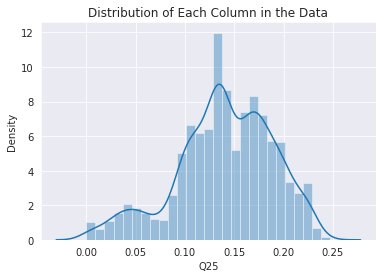

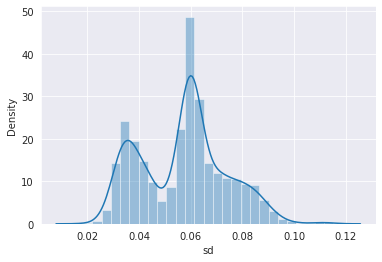

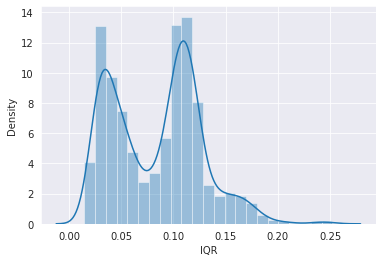

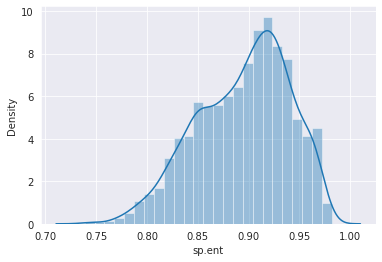

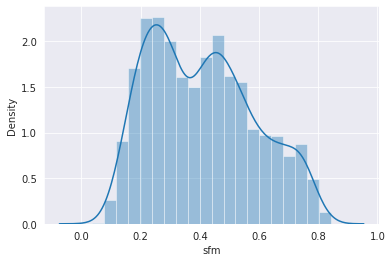

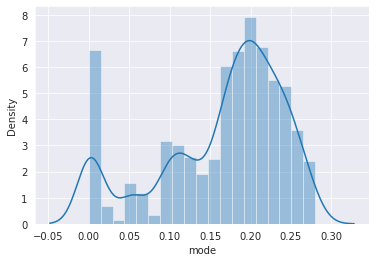

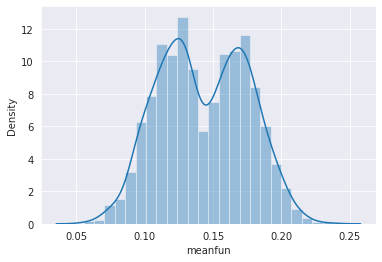

In [35]:
sns.set_style('darkgrid')
plt.title('Distribution of Each Column in the Data')

for i,col in enumerate(X_train.columns):
    plt.figure(i)
    sns.distplot(X_train[col])


As these selected columns look normally distributed so let's move forward with model training.

Logistic Regression and Tree based algorithms such as Decision Tree and Random forest are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kind of models. But for distance based algorithms like KNN and SVM it is better to perform standardization to prevent features with wider ranges from dominating the distance metric.

In [36]:
from sklearn.preprocessing import StandardScaler
#function to perform StandardScaler
def standardization(new_data):
  sc = StandardScaler()

  sc.fit(new_data)                                                                                   

  new_data_scale = sc.transform(new_data)                                                               

  print('After standardizing our features, the first 5 rows of our data now look like this:\n')   
  print(pd.DataFrame(new_data_scale, columns=new_data.columns).head())

In [37]:
standardization(X_train)

After standardizing our features, the first 5 rows of our data now look like this:

         sd       Q25       IQR    sp.ent       sfm      mode   meanfun
0 -0.200347  0.031212 -0.294220  0.513669 -0.073327  0.276075 -0.335977
1  0.475253  0.932621 -1.089047  0.074571  0.384310  0.446923  1.020206
2 -0.667889  0.767694 -0.524618  0.082487 -0.279575  0.164481  0.826664
3  1.437315 -2.088827  1.649179  1.497945  1.908397 -1.920162  1.800999
4  0.640981 -0.063808  0.592806  0.830024  0.805191 -0.117566 -0.199469


In [38]:
standardization(X_test)

After standardizing our features, the first 5 rows of our data now look like this:

         sd       Q25       IQR    sp.ent       sfm      mode   meanfun
0 -1.803539  0.697020 -1.281742 -1.669329 -1.403186  0.196807  0.940235
1  0.189763 -0.057580  0.480945  0.307985 -0.194667 -0.317266 -0.262785
2  1.816974 -1.496106  1.705864  1.659004  2.102959 -1.469087 -0.962817
3 -1.006362  0.329535 -0.796898  0.053266 -0.534656  0.150778  0.226485
4 -1.070921  0.964348 -1.009117 -0.446324 -0.771716  0.761706  0.393116


#** Model training with selected parameters**

In [39]:
# Model Import 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

# Create a list 
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(probability=True)]

In [40]:
# Model training and prediction 
# Creating model pipeline to get the best performing model with default parameters
def CM(y_test,y_pred_test):
  return confusion_matrix(y_test,y_pred_test) 

In [41]:
%%time

print ("Performance of classification models with default parameters")

for eachModel in models:
    model = eachModel
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test,y_pred_test)
    print(eachModel,'\n Test-set confusion matrix:\n', CM(y_test,y_pred_test)) 
    print("recall score: ", recall_score(y_test,y_pred_test))
    print("precision score: ", precision_score(y_test,y_pred_test))
    print("f1 score: ", f1_score(y_test,y_pred_test))
    print("accuracy score: ", accuracy_score(y_test,y_pred_test))
    print("ROC AUC: {} \n\n".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Performance of classification models with default parameters
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 Test-set confusion matrix:
 [[332   5]
 [ 37 260]]
recall score:  0.8754208754208754
precision score:  0.9811320754716981
f1 score:  0.9252669039145908
accuracy score:  0.9337539432176656
ROC AUC: 0.9616341456104067 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       r

*   Among all the models Random Forest, KNN and SVM gives best accuracy of aound 97%, so any of these Algo can be used for prediction.
*   Performing parameter optimization on these models.





**Optimizing KNN parameters**

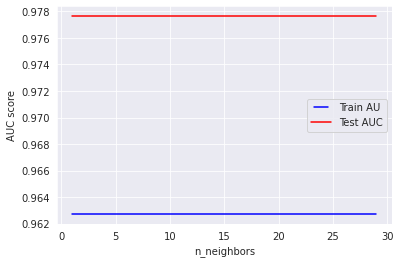

In [42]:
#optimizing n_neighbors
neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
   KNNmodel = KNeighborsClassifier(n_neighbors=n)
   KNNmodel.fit(X_train, y_train)
   y_pred_train = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred_test = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results,'b', label="Train AU")
line2, = plt.plot(neighbors, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

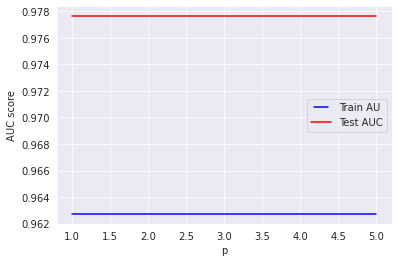

In [43]:
#optimizing p
distances = [1,2,3,4,5]
train_results = []
test_results = []
for p in distances:
   KNNmodel = KNeighborsClassifier(p=p)
   KNNmodel.fit(X_train, y_train)
   y_pred_train = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred_test = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(distances, train_results,'b', label="Train AU")
line2, = plt.plot(distances, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('p')
plt.show()

In [44]:
#optimizing weights
KNNmodel = KNeighborsClassifier(weights='distance')
KNNmodel.fit(X_train, y_train)
y_pred_train = KNNmodel.predict(X_train)
y_pred_test = KNNmodel.predict(X_test)
y_pred_prob = KNNmodel.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred_test)
print('Test-set confusion matrix:\n', CM(y_test,y_pred_test)) 
print("recall score: ", recall_score(y_test,y_pred_test))
print("precision score: ", precision_score(y_test,y_pred_test))
print("f1 score: ", f1_score(y_test,y_pred_test))
print("accuracy score: ", accuracy_score(y_test,y_pred_test))
print("ROC AUC: {} \n\n".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Test-set confusion matrix:
 [[330   7]
 [  6 291]]
recall score:  0.9797979797979798
precision score:  0.9765100671140939
f1 score:  0.9781512605042016
accuracy score:  0.9794952681388013
ROC AUC: 0.9908431495968589 




With weights as distance, there is reduction in one false prediction of female voice as male.

In [45]:
#optimizing algorithm
#algorithm='ball_tree'
KNNmodel = KNeighborsClassifier(algorithm='ball_tree')
KNNmodel.fit(X_train, y_train)
y_pred_train = KNNmodel.predict(X_train)
y_pred_test = KNNmodel.predict(X_test)
y_pred_prob = KNNmodel.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred_test)
print('Test-set confusion matrix:\n', CM(y_test,y_pred_test)) 
print("recall score: ", recall_score(y_test,y_pred_test))
print("precision score: ", precision_score(y_test,y_pred_test))
print("f1 score: ", f1_score(y_test,y_pred_test))
print("accuracy score: ", accuracy_score(y_test,y_pred_test))
print("ROC AUC: {} \n\n".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Test-set confusion matrix:
 [[330   7]
 [  7 290]]
recall score:  0.9764309764309764
precision score:  0.9764309764309764
f1 score:  0.9764309764309764
accuracy score:  0.9779179810725552
ROC AUC: 0.9906383318846228 




In [46]:
#algorithm='kd_tree'
KNNmodel = KNeighborsClassifier(algorithm='kd_tree')
KNNmodel.fit(X_train, y_train)
y_pred_train = KNNmodel.predict(X_train)
y_pred_test = KNNmodel.predict(X_test)
y_pred_prob = KNNmodel.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred_test)
print('Test-set confusion matrix:\n', CM(y_test,y_pred_test)) 
print("recall score: ", recall_score(y_test,y_pred_test))
print("precision score: ", precision_score(y_test,y_pred_test))
print("f1 score: ", f1_score(y_test,y_pred_test))
print("accuracy score: ", accuracy_score(y_test,y_pred_test))
print("ROC AUC: {} \n\n".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Test-set confusion matrix:
 [[330   7]
 [  7 290]]
recall score:  0.9764309764309764
precision score:  0.9764309764309764
f1 score:  0.9764309764309764
accuracy score:  0.9779179810725552
ROC AUC: 0.9906383318846228 




Both algorithms give same results.

**KNN Parameters optimization results:**
- algorithm = Same result with all algos; using default
- metric = same results with all metrics; using default
- n_jobs = -1; using all processors
- n_neighbors = same results in range of (1,30); using default
- p = same results with all distance metrics; using default euclidean_distance (l2) for p = 2
- weights = distance gives one better case

The final set of optimized parameters is:
*   KNeighborsClassifier
                    (algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='distance') 

In [47]:
KNNmodel = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
             weights='distance') 
KNNmodel.fit(X_train, y_train)
y_pred_train = KNNmodel.predict(X_train)
y_pred_test = KNNmodel.predict(X_test)
y_pred_prob = KNNmodel.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred_test)
print('Test-set confusion matrix:\n', CM(y_test,y_pred_test)) 
print("recall score: ", recall_score(y_test,y_pred_test))
print("precision score: ", precision_score(y_test,y_pred_test))
print("f1 score: ", f1_score(y_test,y_pred_test))
print("accuracy score: ", accuracy_score(y_test,y_pred_test))
print("ROC AUC: {} \n\n".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Test-set confusion matrix:
 [[330   7]
 [  6 291]]
recall score:  0.9797979797979798
precision score:  0.9765100671140939
f1 score:  0.9781512605042016
accuracy score:  0.9794952681388013
ROC AUC: 0.9908431495968589 




After parameter optimization, the accuracy increased from 97.7% to 97.9%

**Optimizing Random forest parameters using GridSearchCV**

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators" : [10,50,100],
              "criterion": ["gini", "entropy"],
              "max_depth": [2, 6, 8],
              "max_features": ['auto','sqrt','log2']
              }
rfc = RandomForestClassifier(n_jobs=-1,oob_score = True)
CV_rfc = GridSearchCV(rfc, param_grid = param_grid)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}


In [49]:
y_pred_train = CV_rfc.predict(X_train)
y_pred_test = CV_rfc.predict(X_test)
y_pred_prob = CV_rfc.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred_test)
print('Test-set confusion matrix:\n', CM(y_test,y_pred_test)) 
print("recall score: ", recall_score(y_test,y_pred_test))
print("precision score: ", precision_score(y_test,y_pred_test))
print("f1 score: ", f1_score(y_test,y_pred_test))
print("accuracy score: ", accuracy_score(y_test,y_pred_test))
print("ROC AUC: {} \n\n".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Test-set confusion matrix:
 [[326  11]
 [  4 293]]
recall score:  0.9865319865319865
precision score:  0.9638157894736842
f1 score:  0.9750415973377704
accuracy score:  0.9763406940063092
ROC AUC: 0.9980617250646924 




*   After parameter optimization, the accuracy got reduced from 97.7% to 97.4%
*   The parameters optimized by GridSearchCV are:
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}



**Optimizing SVM parameters using GridSearchCV**

In [50]:
param_grid = {"C" : [10,50,100],
              "gamma": ["scale", "auto"]
              }
svc = SVC(probability=True)
CV_svc = GridSearchCV(svc, param_grid = param_grid)
CV_svc.fit(X_train, y_train)
print (CV_svc.best_params_)

{'C': 50, 'gamma': 'scale'}


In [51]:
y_pred_train = CV_svc.predict(X_train)
y_pred_test = CV_svc.predict(X_test)
y_pred_prob = CV_svc.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred_test)
print('Test-set confusion matrix:\n', CM(y_test,y_pred_test)) 
print("recall score: ", recall_score(y_test,y_pred_test))
print("precision score: ", precision_score(y_test,y_pred_test))
print("f1 score: ", f1_score(y_test,y_pred_test))
print("accuracy score: ", accuracy_score(y_test,y_pred_test))
print("ROC AUC: {} \n\n".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Test-set confusion matrix:
 [[330   7]
 [  5 292]]
recall score:  0.9831649831649831
precision score:  0.9765886287625418
f1 score:  0.9798657718120806
accuracy score:  0.9810725552050473
ROC AUC: 0.9964131922588896 






*   After parameter optimization, the accuracy got increased from 97.7% to 98.1%
*   The parameters optimized by GridSearchCV are:
{'C': 50, 'gamma': 'scale'}



# **Model training with all parameters**

In [52]:
data_encoded1 = data_encoded.drop(columns=['label_male'])
data_encoded1.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label_female
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [53]:
# prepare data for training set

#X- all columns except label(Male, Female)
X_c = data_encoded1.iloc[:, 0:-1]

#Y - label
y_c = data_encoded1.iloc[:, -1]

print(X_c,y_c)

      meanfreq        sd    median  ...    maxdom   dfrange   modindx
0     0.059781  0.064241  0.032027  ...  0.007812  0.000000  0.000000
1     0.066009  0.067310  0.040229  ...  0.054688  0.046875  0.052632
2     0.077316  0.083829  0.036718  ...  0.015625  0.007812  0.046512
3     0.151228  0.072111  0.158011  ...  0.562500  0.554688  0.247119
4     0.135120  0.079146  0.124656  ...  5.484375  5.476562  0.208274
...        ...       ...       ...  ...       ...       ...       ...
3163  0.131884  0.084734  0.153707  ...  4.210938  4.203125  0.161929
3164  0.116221  0.089221  0.076758  ...  3.679688  3.640625  0.277897
3165  0.142056  0.095798  0.183731  ...  2.937500  2.929688  0.194759
3166  0.143659  0.090628  0.184976  ...  3.593750  3.585938  0.311002
3167  0.165509  0.092884  0.183044  ...  0.554688  0.546875  0.350000

[3168 rows x 20 columns] 0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label_female, Leng

In [54]:
#Test-train split
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [55]:
standardization(X_train_c)

After standardizing our features, the first 5 rows of our data now look like this:

   meanfreq        sd    median  ...    maxdom   dfrange   modindx
0 -0.016393 -0.200347  0.103299  ... -0.258795 -0.250583 -0.384099
1  0.159693  0.475253  0.502570  ...  0.269624  0.278002 -0.733206
2  0.768417 -0.667889  0.445050  ...  0.982990  0.991593 -0.754531
3 -2.168469  1.437315 -2.302982  ... -0.983169 -0.970781  0.644199
4 -0.032091  0.640981 -0.623959  ... -0.300903 -0.298486  0.735203

[5 rows x 20 columns]


In [56]:
standardization(X_test_c)

After standardizing our features, the first 5 rows of our data now look like this:

   meanfreq        sd    median  ...    maxdom   dfrange   modindx
0  0.193185 -1.803539 -0.023736  ... -1.392353 -1.379877 -0.527233
1  0.262441  0.189763  0.281899  ...  1.100619  1.109304 -0.612237
2 -1.029570  1.816974 -0.297026  ...  0.174068  0.187045  1.332101
3  0.086055 -1.006362 -0.072566  ... -0.454335 -0.441559 -0.048189
4  0.813467 -1.070921  0.698075  ...  1.712968  1.673672 -0.487998

[5 rows x 20 columns]


In [57]:
# Create a list 
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(probability=True)]

In [58]:
%%time
print ("Performance of classification models with default parameters")

for eachModel in models:
    model = eachModel
    model.fit(X_train_c, y_train_c)

    y_pred_train = model.predict(X_train_c)
    y_pred_test = model.predict(X_test_c)
    y_pred_prob = model.predict_proba(X_test_c)
    accuracy = accuracy_score(y_test_c,y_pred_test)
    print(eachModel,'\n Test-set confusion matrix:\n', CM(y_test_c,y_pred_test)) 
    print("recall score: ", recall_score(y_test_c,y_pred_test))
    print("precision score: ", precision_score(y_test_c,y_pred_test))
    print("f1 score: ", f1_score(y_test_c,y_pred_test))
    print("accuracy score: ", accuracy_score(y_test_c,y_pred_test))
    print("ROC AUC: {} \n\n".format(roc_auc_score(y_test_c, y_pred_prob[:,1])))

Performance of classification models with default parameters
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 Test-set confusion matrix:
 [[281  56]
 [ 63 234]]
recall score:  0.7878787878787878
precision score:  0.8068965517241379
f1 score:  0.797274275979557
accuracy score:  0.8123028391167192
ROC AUC: 0.8583860364275795 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       ra

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
 Test-set confusion matrix:
 [[329   8]
 [  3 294]]
recall score:  0.98989898989899
precision score:  0.9735099337748344
f1 score:  0.981636060100167
accuracy score:  0.9826498422712934
ROC AUC: 0.9978569073524564 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
 Test-set confusion matrix:
 [[239  98]
 [ 89 2

Except Random Forest all other models show lower accuracy by considerable margin.

# **Conclusion**



*   Feature selection can help in reducing noise from data as well as reduce time of processing
*   In this case, the time of compuation for model pipeline comes out to be 1.43s with selected parameters and 3.53s with all parameters.
*   The time of computation with all models is around 2.5 times of model computation time with selected properties.
*   Another experiment could be done with PCA by combining the columns using principal components hence reducing the noise and at the same time losing a little information.




